In [7]:
import flowkit as fk

import numpy as np
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

data_dir = Path("../../data/fcs_samples/HPC_samples")

In [9]:
list(data_dir.glob("*.fcs"))

[PosixPath('../../data/fcs_samples/HPC_samples/HPC_UnstainedMix.fcs'),
 PosixPath('../../data/fcs_samples/HPC_samples/HPC_CD34-PE.fcs'),
 PosixPath('../../data/fcs_samples/HPC_samples/HPC_CD43-APC.fcs'),
 PosixPath('../../data/fcs_samples/HPC_samples/HPC_CD45-FITC.fcs'),
 PosixPath('../../data/fcs_samples/HPC_samples/HPC_IsotypeMix.fcs'),
 PosixPath('../../data/fcs_samples/HPC_samples/HPC_DAPI-BV421.fcs')]

In [ ]:
wsp_log_transformer = fk.transforms.WSPLogTransform(1,1)
log_transformer = fk.transforms.LogTransform(param_t=262144, param_m=1)

In [34]:
# key and Sample.id are channel name
samples = {path.stem: fk.Sample(path, sample_id=path.stem) for path in data_dir.glob("*.fcs")}

# for sample in samples.values():
    # sample.apply_transform(wsp_log_transformer)
    # sample.apply_transform(log_transformer)

sample_df = {k: sample.as_dataframe(source='raw') for k, sample in samples.items()}

In [35]:
df = pd.concat(sample_df.values())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (FSC-A, )    60000 non-null  float64
 1   (FSC-H, )    60000 non-null  float64
 2   (SSC-A, )    60000 non-null  float64
 3   (SSC-H, )    60000 non-null  float64
 4   (FITC-A, )   60000 non-null  float64
 5   (FITC-H, )   60000 non-null  float64
 6   (APC-A, )    60000 non-null  float64
 7   (APC-H, )    60000 non-null  float64
 8   (YG-PE-A, )  60000 non-null  float64
 9   (YG-PE-H, )  60000 non-null  float64
 10  (BV421-A, )  60000 non-null  float64
 11  (BV421-H, )  60000 non-null  float64
 12  (Time, )     60000 non-null  float64
dtypes: float64(13)
memory usage: 6.4 MB


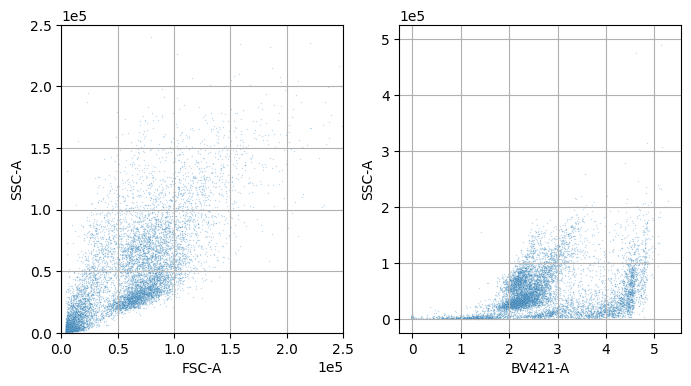

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(4*2, 4))
sns.scatterplot(sample_df['HPC_DAPI-BV421'], x='FSC-A', y='SSC-A', s=1, alpha=0.25, ax=axes[0])
axes[0].set_xlim(0, 2.5e5)
axes[0].set_ylim(0, 2.5e5)

sns.scatterplot(sample_df['HPC_DAPI-BV421'], x='BV421-A', y='SSC-A', s=1, alpha=0.25, ax=axes[1])

for ax in axes:
    ax.ticklabel_format(style='sci', scilimits=[0, 0])
    ax.grid()
plt.show()